<a href="https://colab.research.google.com/github/joyc-mock/MIT-Applied-Data-Science-all-courses/blob/main/PracticePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Education_Post_12th_Standard.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
data[(data.PhD > 100)]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
582,Texas A&M University at Galveston,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [ ]:
data.loc[582, "PhD"] = 100

In [ ]:
data[(data.Grad_Rate > 100)]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [ ]:
data.loc[95, "Grad_Rate"] = 100

In [ ]:
data.drop(columns = "Names", inplace=True)

In [ ]:
cont_cols = list(data.columns)

Apps
Skew: 3.72


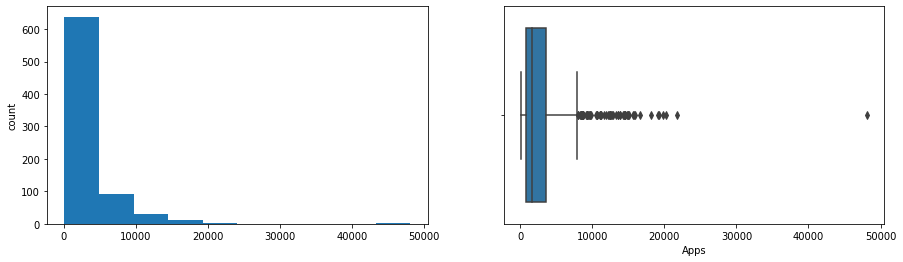

Accept
Skew: 3.42


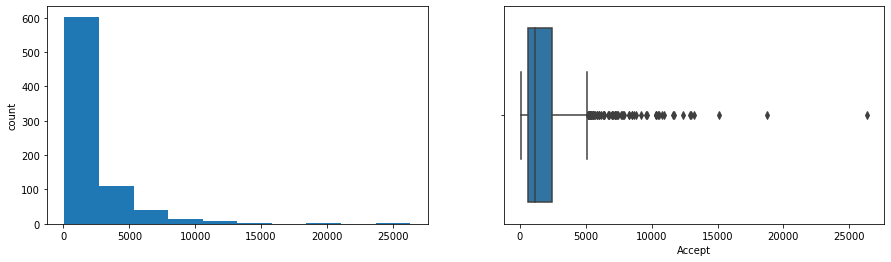

Enroll
Skew: 2.69


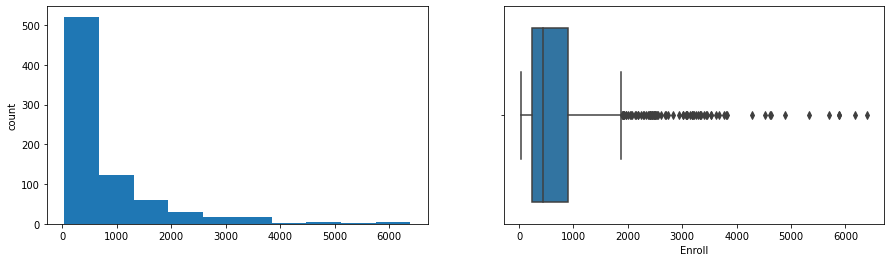

Top10perc
Skew: 1.41


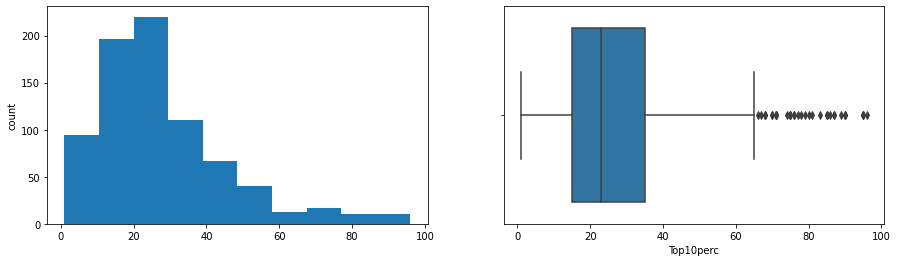

Top25perc
Skew: 0.26


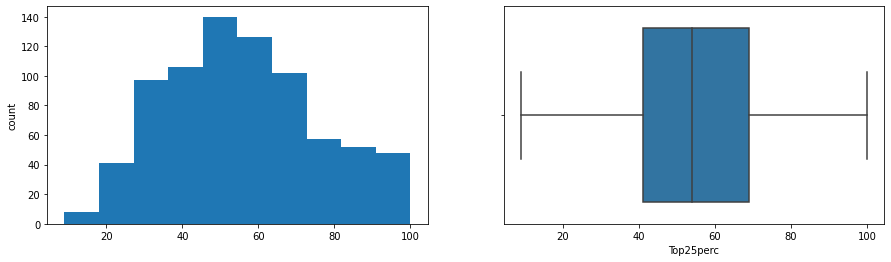

F_Undergrad
Skew: 2.61


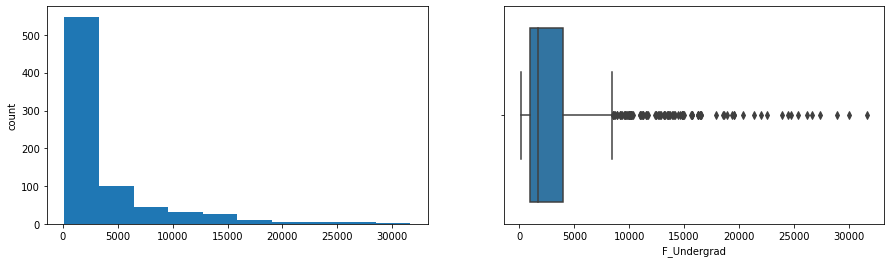

P_Undergrad
Skew: 5.69


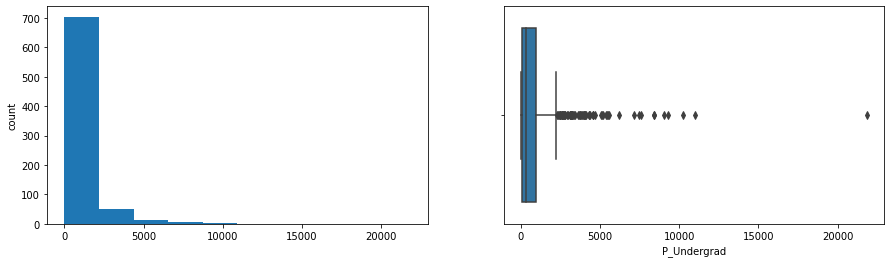

Outstate
Skew: 0.51


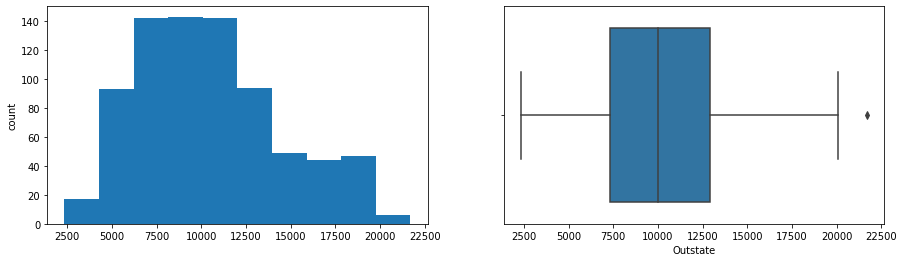

Room_Board
Skew: 0.48


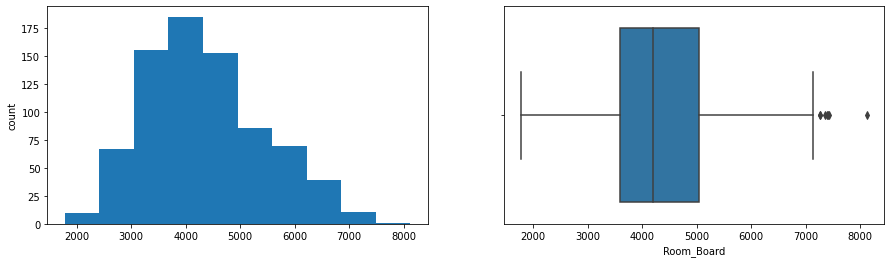

Books
Skew: 3.49


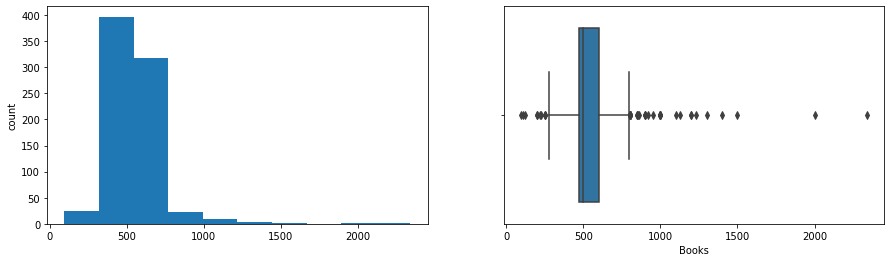

Personal
Skew: 1.74


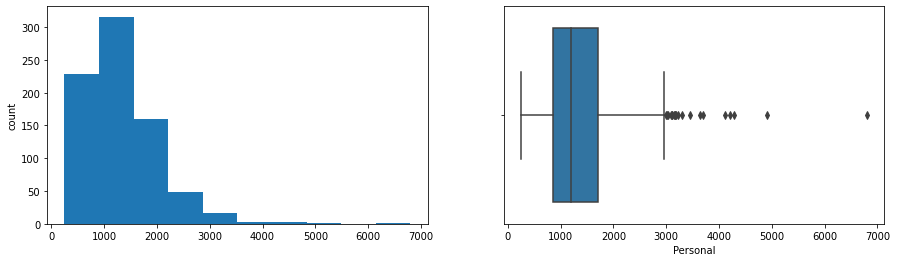

PhD
Skew: -0.77


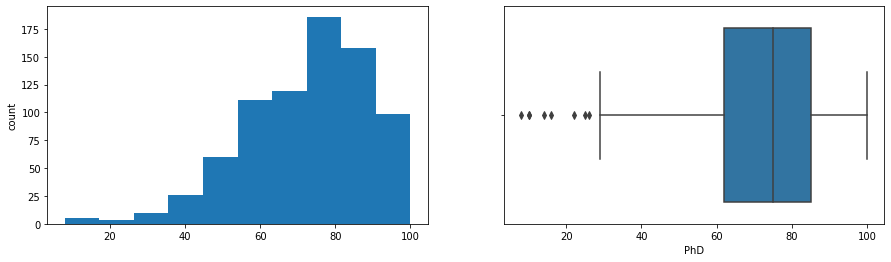

Terminal
Skew: -0.82


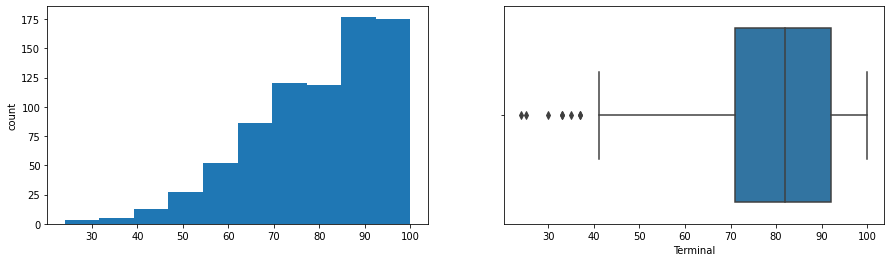

S_F_Ratio
Skew: 0.67


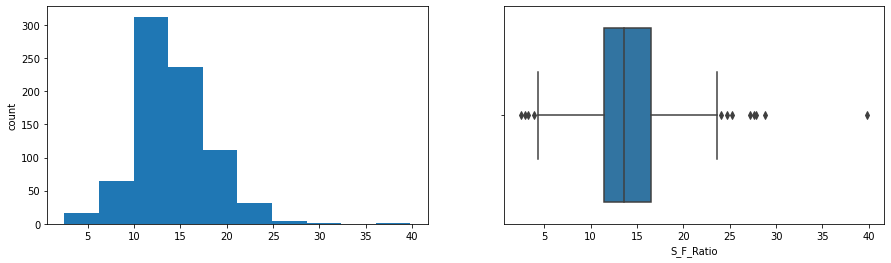

perc_alumni
Skew: 0.61


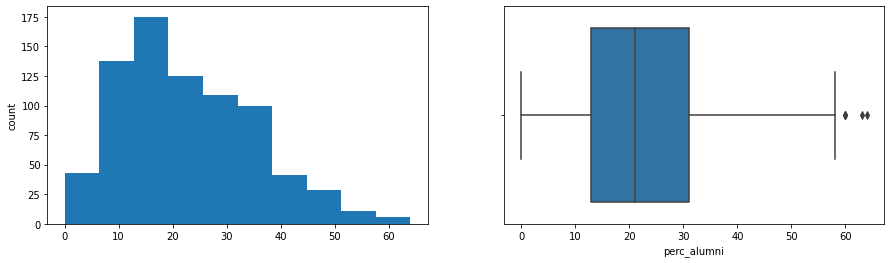

Expend
Skew: 3.46


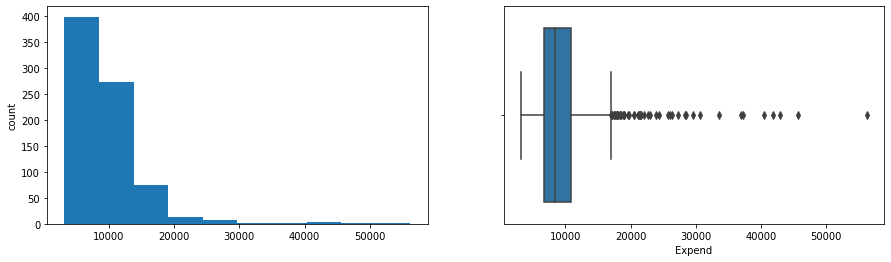

Grad_Rate
Skew: -0.14


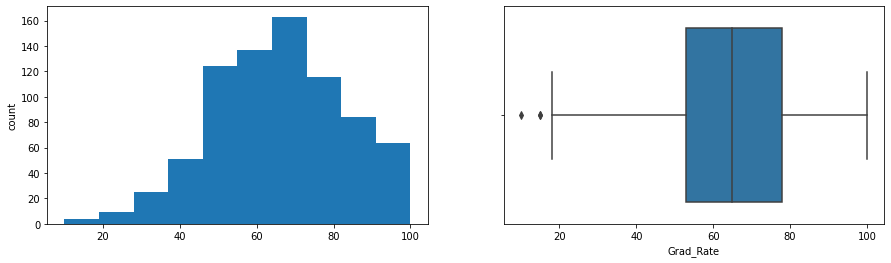

In [ ]:
for col in cont_cols:
  print(col)
  print('Skew:', round(data[col].skew(), 2))
  plt.figure(figsize=(15,4))
  plt.subplot(1, 2, 1)
  data[col].hist(bins=10, grid=False)
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data[col])
  plt.show()





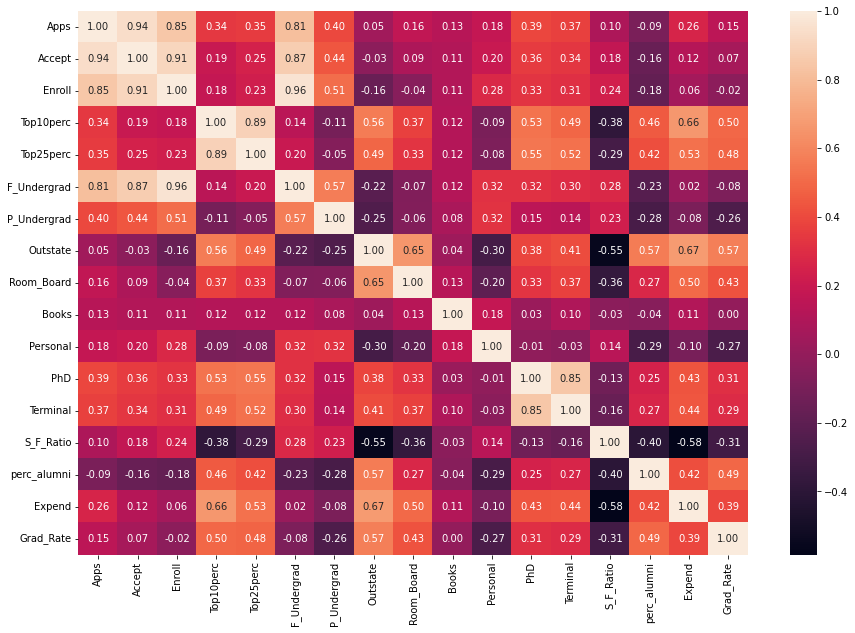

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt = '0.2f')
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data_scaled.head()


,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


In [ ]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F_Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P_Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room_Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


In [ ]:
n = data_scaled.shape[1]
pca = PCA(n_components=n, random_state=1)
data_pca1=pd.DataFrame(pca.fit_transform(data_scaled))
exp_var=pca.explained_variance_ratio_

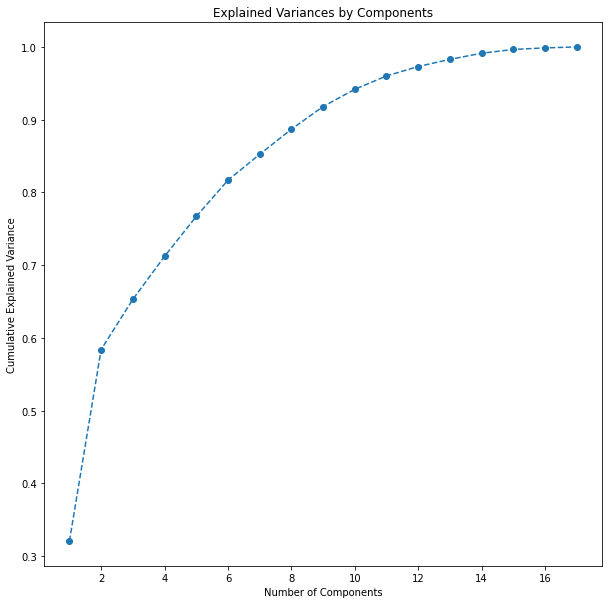

In [ ]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()